# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
#hide
df_all = read_api()
df_all.index.name = 'date'
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
#df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
df_covid = df_covid[['ETH', 'BTC', 'XAU']]

/Users/Dom/Documents/Bachelor/corr-app/_notebooks/scripts/read_data.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['currency'] = df_final.apply(lambda row: fsym, axis=1)


### Kainų kaita pandemijos metu

<AxesSubplot:xlabel='date'>

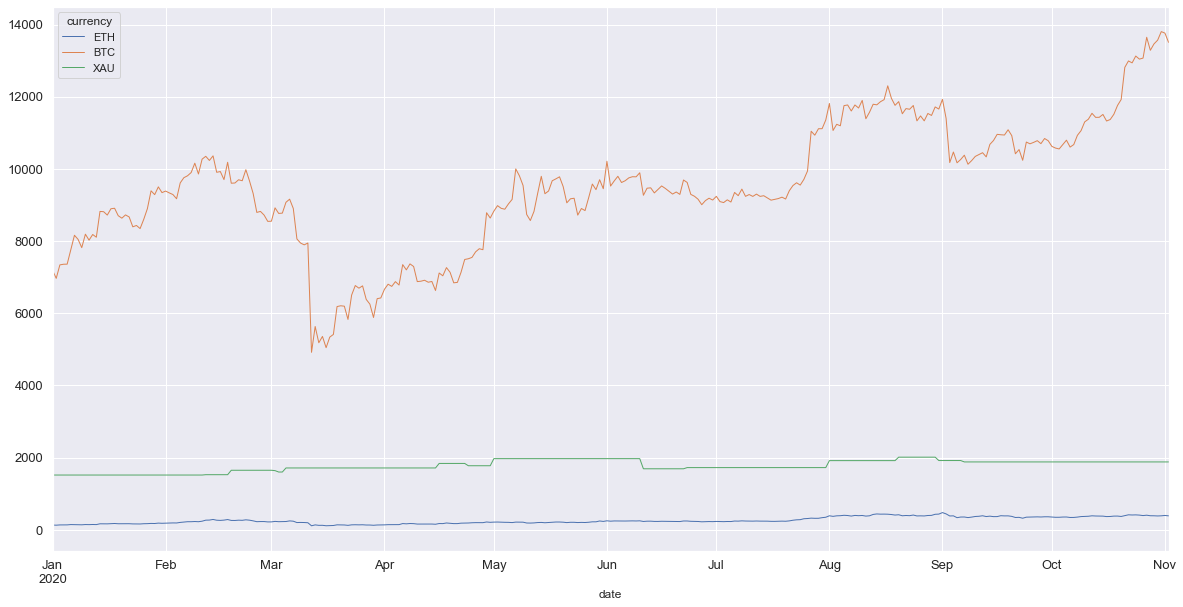

In [5]:
#hide_input
df_covid.plot(figsize=(20,10), linewidth=1, fontsize=13)
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()

currency,ETH,BTC,XAU
currency,,,
ETH,1.000000,0.908092,0.565587
BTC,0.908092,1.000000,0.451230
XAU,0.565587,0.451230,1.000000


Koreliacijos matrica.

<AxesSubplot:xlabel='currency', ylabel='currency'>

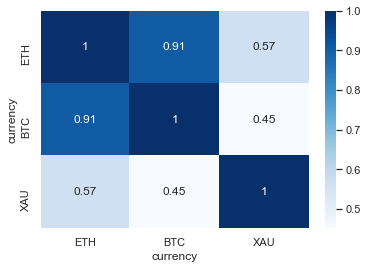

In [8]:
#hide_input
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues")
# plt.savefig('covid.eps', format='eps')